In [1]:
# PCA 차원축소

from sklearn.datasets import fetch_openml  
# fetch_openml은 사이킷런에서 제공하는 함수로, OpenML(머신러닝 데이터셋을 제공하는 사이트)에서 데이터셋을 다운로드 해줌. MNIST데이터셋을 가져오기 위해 이 함수를 사용함.
import pandas as pd

# MNIST 데이터셋 불러오기
mnist = fetch_openml('mnist_784', version=1)
# mnist_784 : MNIST데이터셋의 이름. 28*28픽셀 (즉, 784개의 픽셀값)로 구성된 손글씨 숫자 이미지들로 되어 있음.
#version=1 : 데이터셋의 버전을 지정. 최신버전을 가져옴.

# 데이터와 레이블 분리
X = mnist.data    # 숫자 이미지 데이터입니다. X에는 70,000개의 샘플이 있고, 각 샘플은 784개의 픽셀 값(28x28 이미지)이 포함.
y = mnist.target  # 이미지의 레이블입니다. 즉, 각 손글씨 이미지가 나타내는 실제 숫자(0~9)를 의미합니다. y에는 70,000개의 숫자 레이블이 들어있음.

# 데이터 프레임의 첫 5행 출력
print(X.head())
print(y.head())


   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0        0  ...         0         0         0         0         0         0   
1        0  ...         0         0         0         0         0         0   
2        0  ...         0         0         0         0         0         0   
3        0  ...         0         0         0         0         0         0   
4        0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0       

In [2]:
from sklearn.preprocessing import StandardScaler

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
from sklearn.decomposition import PCA

# PCA 모델 생성
pca = PCA(n_components=0.95)  # 전체 분산의 95%를 설명하는 주성분 선택

# PCA 학습 및 변환
X_pca = pca.fit_transform(X_scaled)     # X_pca에는 PCA로 차원 축소된 데이터가 들어감. 이 데이터는 원래 차원보다 낮은 차원으로, 주성분 공간에서 표현됨.

# 변환된 데이터의 크기 확인
print(X_pca.shape)


(70000, 332)


In [7]:
# 선택된 주성분의 수
print(f'선택된 주성분의 수: {pca.n_components_}')

# 각 주성분이 설명하는 분산 비율
print(f'각 주성분이 설명하는 분산 비율: {pca.explained_variance_ratio_}')

# 누적 분산 비율
print(f'누적 분산 비율: {pca.explained_variance_ratio_.cumsum()}')

선택된 주성분의 수: 332
각 주성분이 설명하는 분산 비율: [0.05642719 0.04041226 0.03738273 0.02893    0.02520752 0.02192549
 0.01914282 0.01740684 0.01532232 0.01396087 0.01342175 0.01201421
 0.01113962 0.01090582 0.01027986 0.00994955 0.00931255 0.00919635
 0.008886   0.00863195 0.00821741 0.00798417 0.00762573 0.00742315
 0.0071657  0.00689314 0.00681399 0.00654588 0.00627293 0.00610345
 0.00597261 0.00589304 0.00567358 0.00559358 0.00552473 0.00534443
 0.00527593 0.00515841 0.00505498 0.00477438 0.00476312 0.00465155
 0.00453454 0.00445757 0.00442313 0.00437877 0.00437294 0.00427724
 0.00424808 0.00418524 0.00404059 0.00396258 0.00393176 0.00390562
 0.00386444 0.00377501 0.00373883 0.00368328 0.00360377 0.0035637
 0.00349289 0.00344527 0.00343239 0.00341    0.00334463 0.00332107
 0.00329803 0.00319433 0.0031711  0.00315431 0.00309941 0.00305782
 0.00305095 0.0030396  0.00296635 0.00292958 0.00291295 0.00290232
 0.00288608 0.00287022 0.00284514 0.00281524 0.00279245 0.00278629
 0.00278233 0.00276733 0.002

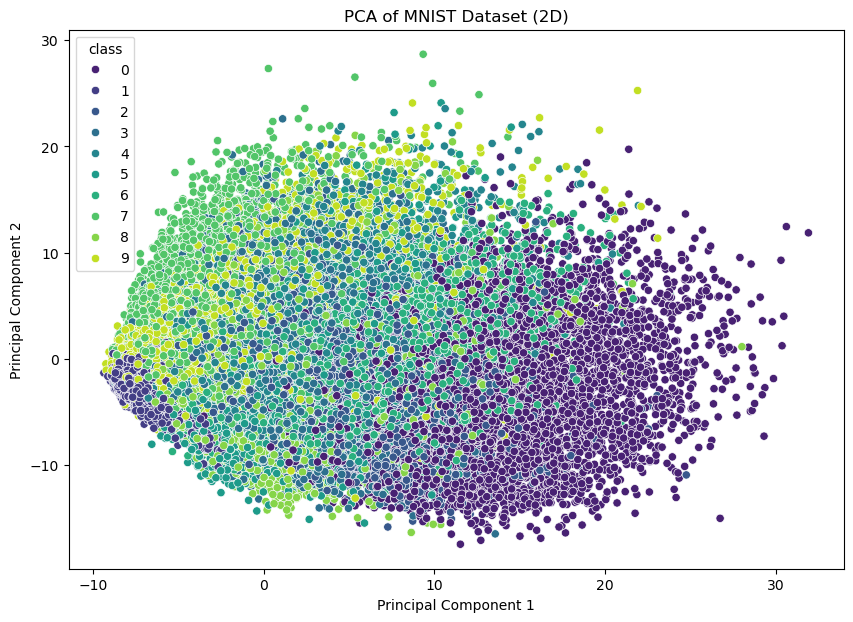

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2차원 시각화
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis', legend=True)
                             # y는 데이터셋의 레이블(MNIST 숫자 0~9)숫자. 각 레이블에 따라 색상이 다르게 표시됨.
plt.title('PCA of MNIST Dataset (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

